In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [ ]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-27,2.977838,3.010715,2.934003,2.945460,2.938244,141994242
2004-09-28,3.021176,3.173106,2.994028,3.159657,3.151916,340190355
2004-09-29,3.155672,3.362895,3.143966,3.264763,3.256765,613229953
2004-09-30,3.235373,3.295149,3.212957,3.227901,3.219993,276468402
2004-10-01,3.257789,3.343468,3.210466,3.302123,3.294034,303934969


In [ ]:
google_data.shape

(5034, 6)

In [ ]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,46.406627,46.895182,45.942227,46.425998,46.315702,1.144716e+08
std,44.414908,44.903012,43.977839,44.442555,44.343261,1.492123e+08
min,2.977838,3.010715,2.934003,2.945460,2.938244,1.584340e+05
25%,13.138504,13.268392,13.002825,13.130720,13.098553,2.704888e+07
50%,27.380078,27.599975,27.099013,27.355894,27.288877,5.353329e+07
75%,61.312001,61.775874,60.679626,61.250501,61.100449,1.399757e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-09-27 to 2024-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [ ]:
google_data.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

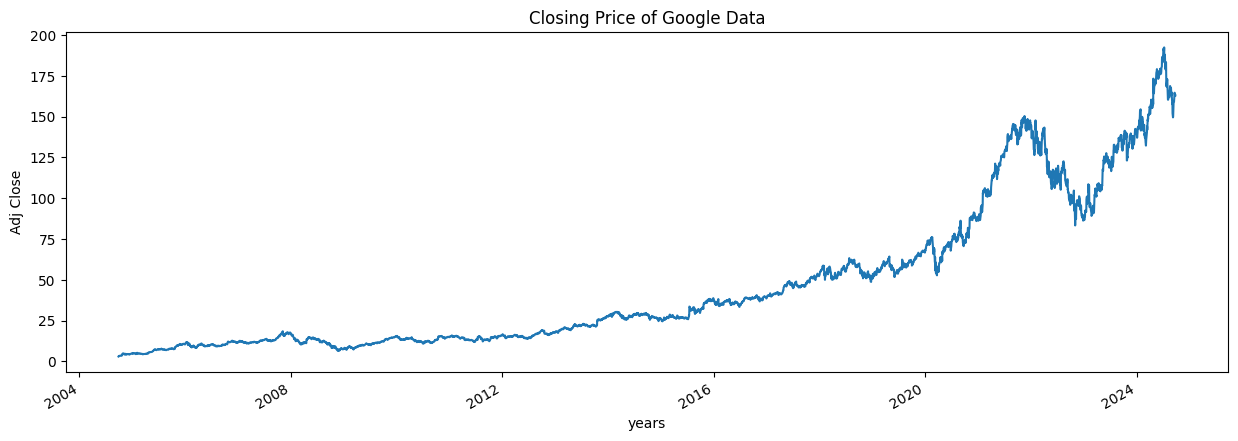

In [ ]:
plt.figure(figsize=(15, 5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Google Data")
plt.show()

In [ ]:
def plot_graph(figsize, values, column_name):
  plt.figure()
  values.plot(figsize= figsize)
  plt.xlabel("years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Google Data")
  plt.show()

In [ ]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

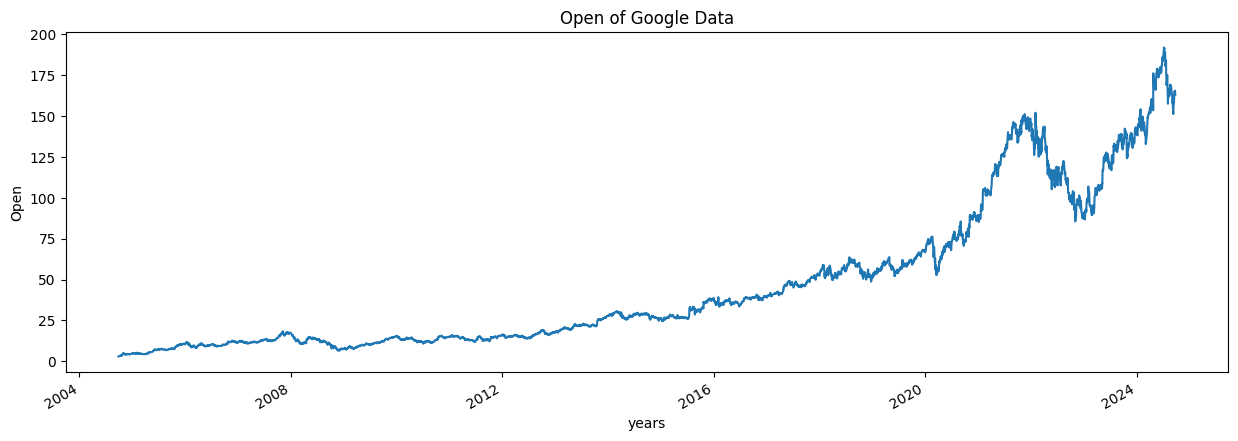

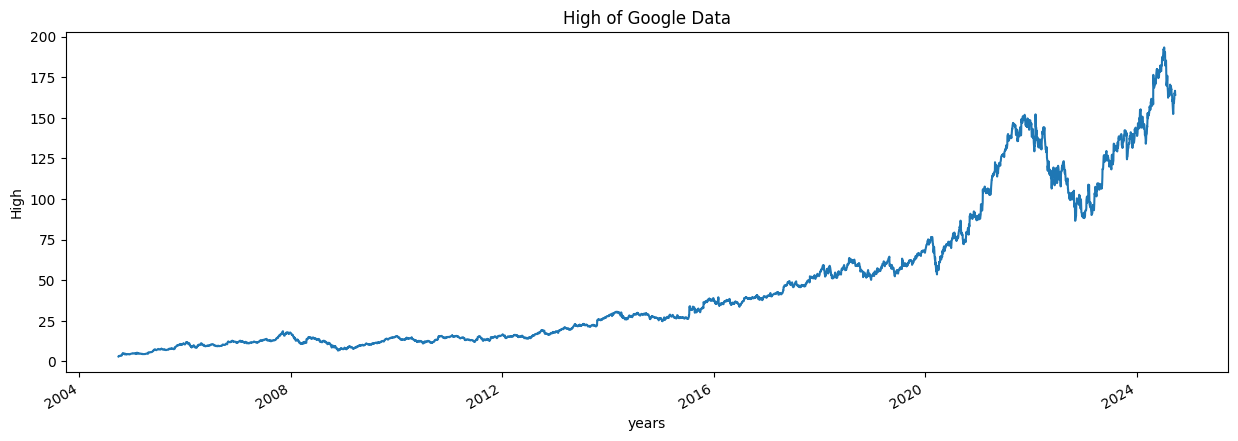

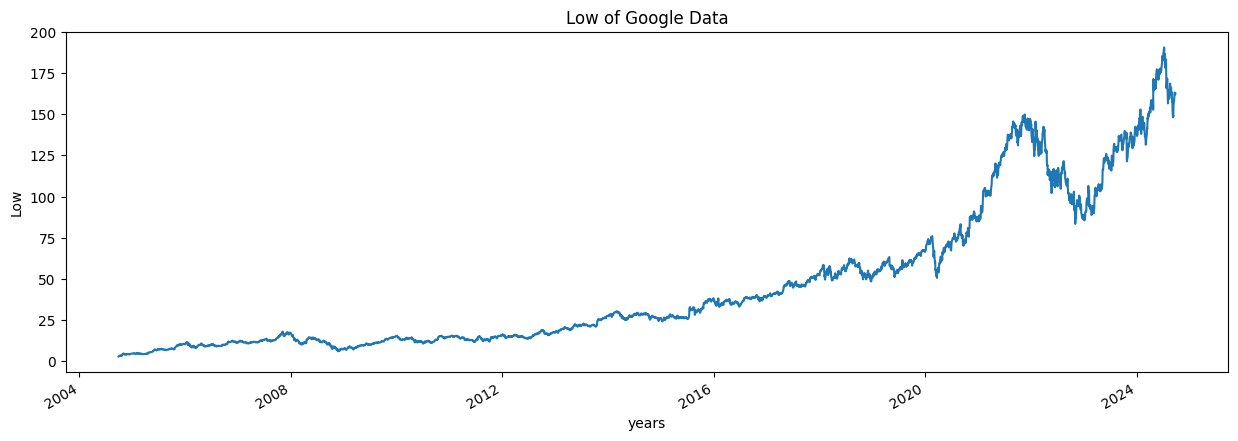

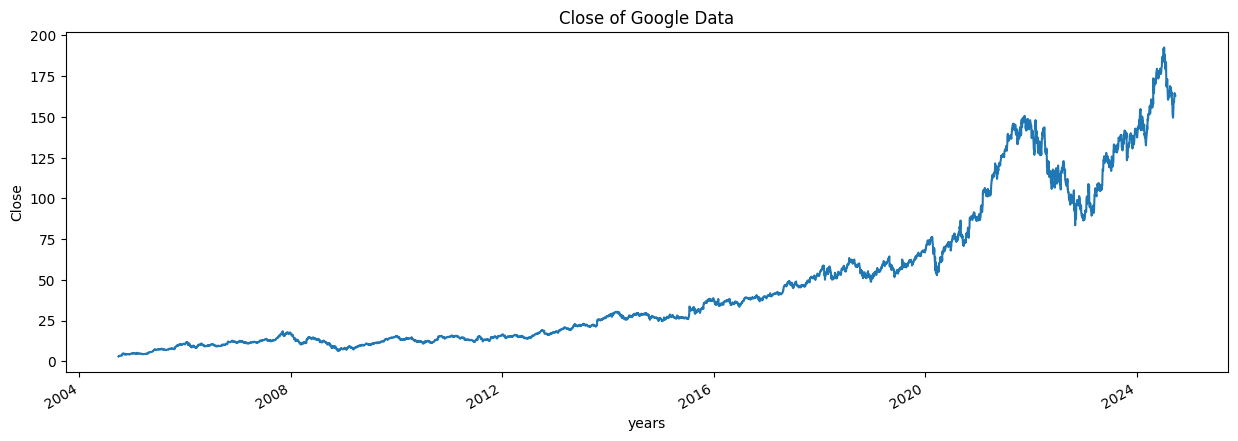

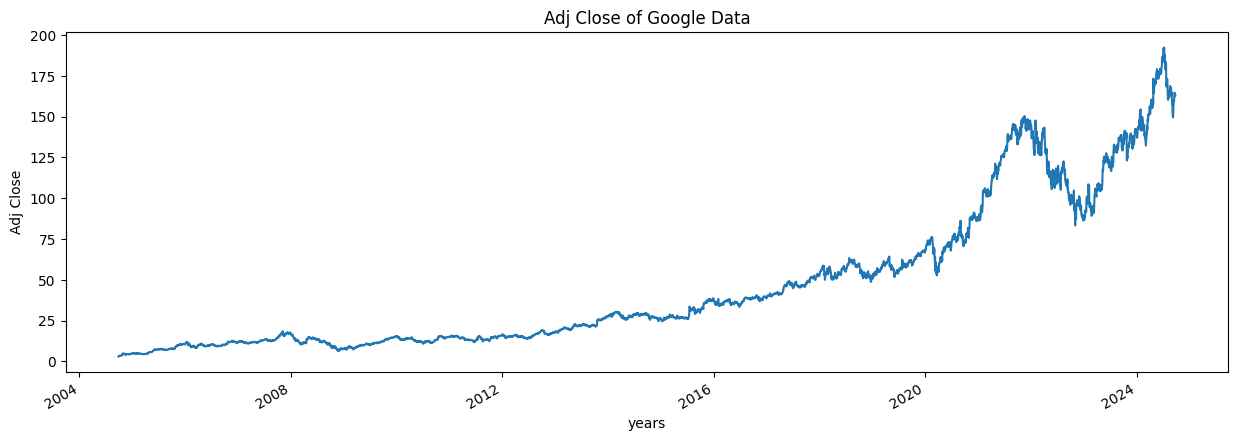

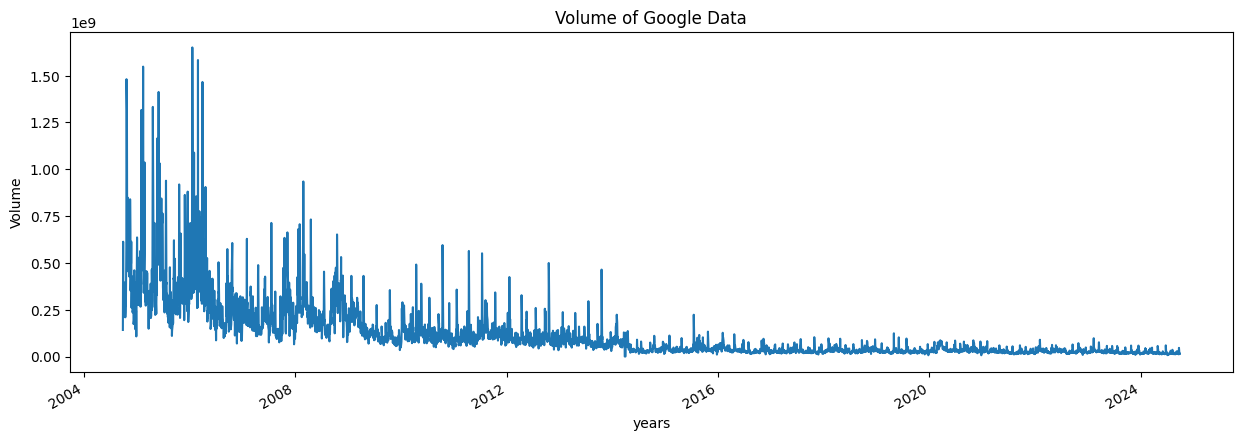

In [ ]:
for column in google_data.columns:
  plot_graph((15, 5), google_data[column], column)

In [ ]:
10, 20, 30, 40, 50, 60, 70, 80, 90, 100

MA for 5 days ==> null null null null

In [ ]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[:5])/5)

30.0


In [ ]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [ ]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [ ]:
for i in range(2004,2025):
  print(i, list(google_data.index.year).count(i))

2004 68
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 185


In [ ]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [ ]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-09-15,NaN
2005-09-16,NaN
2005-09-19,NaN
2005-09-20,NaN
2005-09-21,5.496503


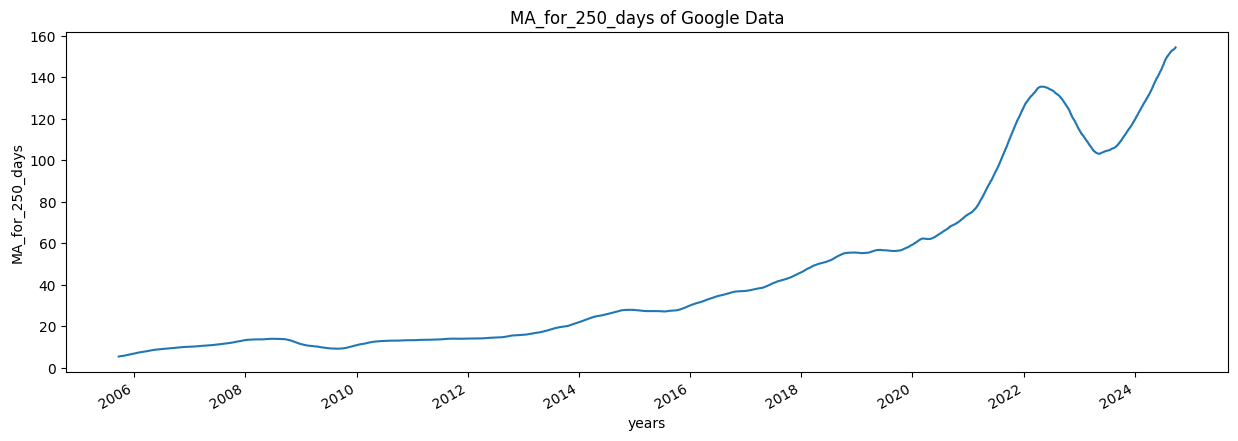

In [ ]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

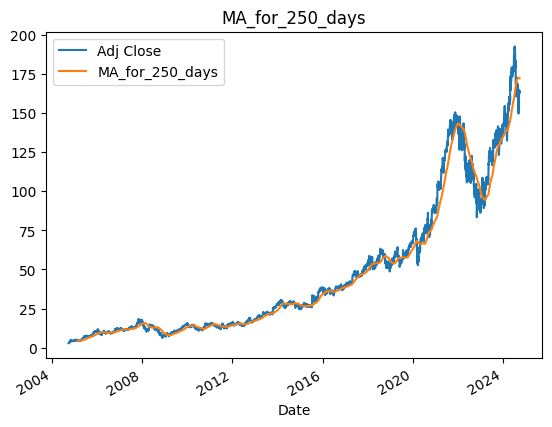

In [42]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

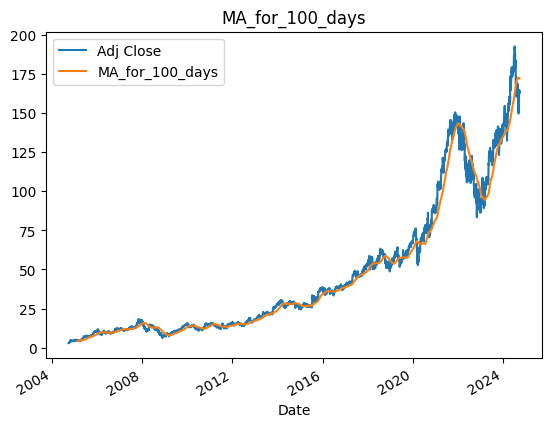

In [40]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')

<Figure size 2000x1000 with 0 Axes>

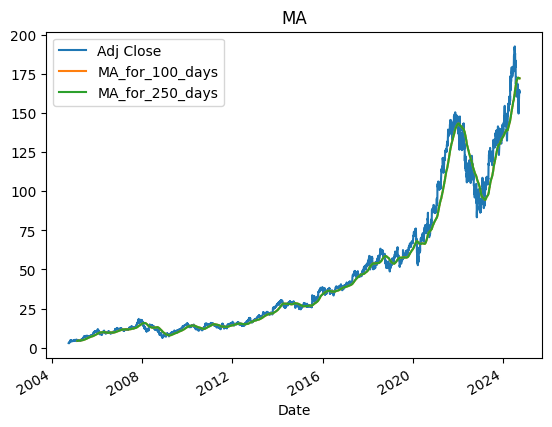

In [45]:
plot_graph((20,10), google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

In [47]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close', 'percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-09-27,2.938244,NaN
2004-09-28,3.151916,0.072721
2004-09-29,3.256765,0.033265
2004-09-30,3.219993,-0.011291
2004-10-01,3.294034,0.022994


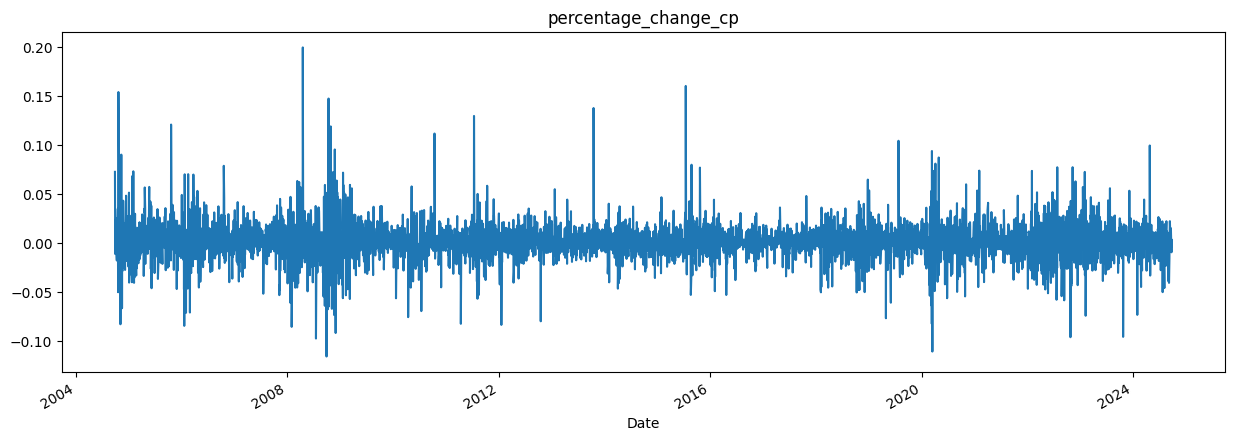

In [48]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change_cp')

In [49]:
Adj_close_price = google_data[['Adj Close']]

In [50]:
max(Adj_close_price.values), min(Adj_close_price.values)

(array([192.40672302]), array([2.93824434]))

In [52]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0, 1))


scaled_data = scaler.fit_transform(Adj_close_price)

scaled_data


array([[0.        ],
       [0.00112774],
       [0.00168113],
       ...,
       [0.84516308],
       [0.84817145],
       [0.84474084]])

In [53]:
len(scaled_data)

5034

In [59]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data),np.array(y_data)


In [60]:
x_data[0],y_data[0]

(array([[0.        ],
        [0.00112774],
        [0.00168113],
        [0.00148705],
        [0.00187783],
        [0.00220304],
        [0.00263709],
        [0.00246793],
        [0.00270003],
        [0.00255316],
        [0.00222926],
        [0.00250989],
        [0.00296885],
        [0.0031131 ],
        [0.00338979],
        [0.00405202],
        [0.00389203],
        [0.00291509],
        [0.00408086],
        [0.00710349],
        [0.00906655],
        [0.00833221],
        [0.00887903],
        [0.00984024],
        [0.00949143],
        [0.01019823],
        [0.01004612],
        [0.00962649],
        [0.00871249],
        [0.00669959],
        [0.00711922],
        [0.00661436],
        [0.00650421],
        [0.00849219],
        [0.00835843],
        [0.00873479],
        [0.00711791],
        [0.00711266],
        [0.00646225],
        [0.00670615],
        [0.00614228],
        [0.00645962],
        [0.00740903],
        [0.00801618],
        [0.00823386],
        [0

In [61]:
int(len(x_data)*0.7)

3453

In [64]:
5034-100-int(len(x_data)*0.7)

1481

In [83]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [84]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [85]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [92]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [95]:
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 319s 92ms/step - loss: 3.2418e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 312s 90ms/step - loss: 5.8125e-05


In [96]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [97]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step


In [98]:
predictions

array([[0.27069122],
       [0.26771334],
       [0.267124  ],
       ...,
       [0.8393839 ],
       [0.83855605],
       [0.8382438 ]], dtype=float32)

In [99]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 54.225697],
       [ 53.66148 ],
       [ 53.54982 ],
       ...,
       [161.97504 ],
       [161.81818 ],
       [161.75902 ]], dtype=float32)

In [102]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.87709808],
       [ 52.66117477],
       [ 54.53556824],
       ...,
       [163.07000732],
       [163.63999939],
       [162.99000549]])

In [103]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [104]:
rmse

0.0

In [106]:
ploting_data = pd.DataFrame(
    {
        'original_test_data': inv_y_test.reshape(-1),
          'predictions' : inv_predictions.reshape(-1)
    } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-11-05,51.877098,51.877098
2018-11-06,52.661175,52.661175
2018-11-07,54.535568,54.535568
2018-11-08,53.987415,53.987415
2018-11-09,53.176907,53.176907


<Figure size 1500x600 with 0 Axes>

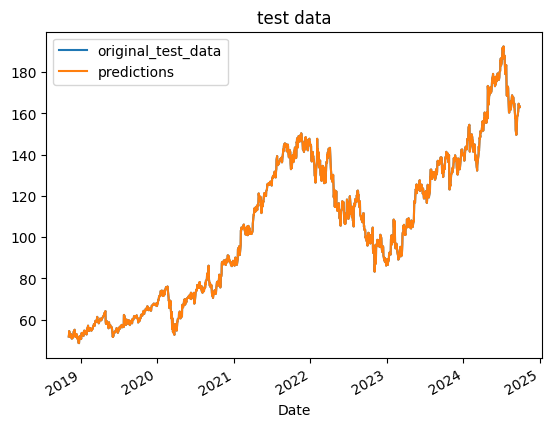

In [107]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 1500x600 with 0 Axes>

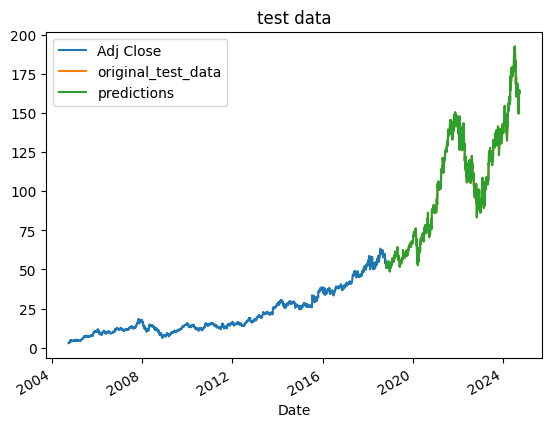

In [108]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100], ploting_data], axis=0), 'test data')

In [109]:
model.save("Latest_stock_price_model.keras")